In [1]:
import pandas as pd
data=pd.read_csv("cleaned_google_playstore_data")

In [2]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,1,2018,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,1,2018,15


In [13]:
pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


In [14]:
import sweetviz as sv

my_report = sv.analyze(data)

/opt/conda/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/opt/conda/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] =

In [3]:
my_report

NameError: name 'my_report' is not defined

In [15]:
my_report.show_html("SWEETVIZ_REPORT.html")

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'month', 'year', 'day'],
      dtype='object')

In [6]:
data[data.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,day
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3,2,2018,26
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,7,2018,31
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,7,2018,24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,7,2018,20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,7,2018,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0,2,2016,25
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0,7,2018,6
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4,3,2018,24
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4,7,2018,30


In [7]:
data=data.drop_duplicates(subset=['App'],keep='first')

In [8]:
data.shape

(9659, 16)

In [9]:
numeric_features=[feature for feature in data.columns if data[feature].dtype!='O']

In [10]:
categorical_features=[feature for feature in data.columns if data[feature].dtype =='O']

In [11]:
data[numeric_features]

,Rating,Reviews,Size,Installs,Price,month,year,day
0,4.1,159,19000.0,10000,0.0,1,2018,7
1,3.9,967,14000.0,500000,0.0,1,2018,15
2,4.7,87510,8700.0,5000000,0.0,8,2018,1
3,4.5,215644,25000.0,50000000,0.0,6,2018,8
4,4.3,967,2800.0,100000,0.0,6,2018,20
...,...,...,...,...,...,...,...,...
10835,4.5,38,53000.0,5000,0.0,7,2017,25
10836,5.0,4,3600.0,100,0.0,7,2018,6
10837,NaN,3,9500.0,1000,0.0,1,2017,20
10838,4.5,114,NaN,1000,0.0,1,2015,19


In [12]:
data[categorical_features]

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [13]:

data["Type"].value_counts(normalize=True)*100  #valuecounts

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

In [14]:
for col in categorical_features:
    print(f"{col}:{data[col].value_counts(normalize=True)*100}")
    print("============================================================")

App:Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
Category:FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
S

<AxesSubplot: xlabel='Type', ylabel='count'>

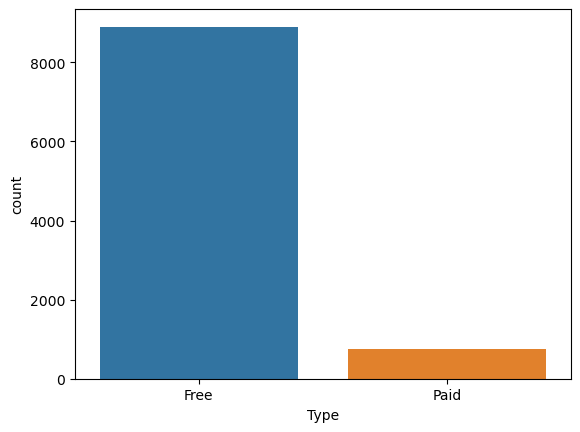

In [15]:
sns.countplot(x=data['Type'])

<AxesSubplot: xlabel='Content Rating', ylabel='count'>

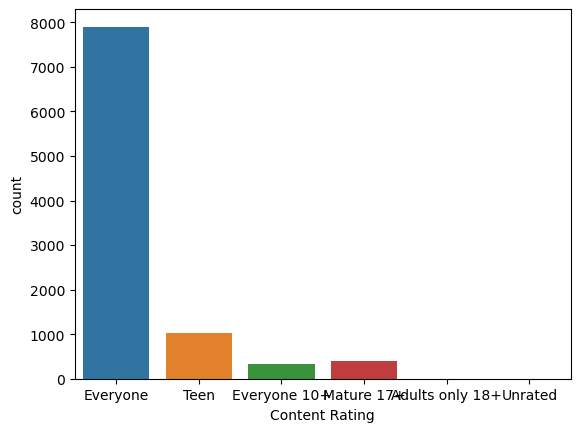

In [16]:
sns.countplot(x=data['Content Rating'])

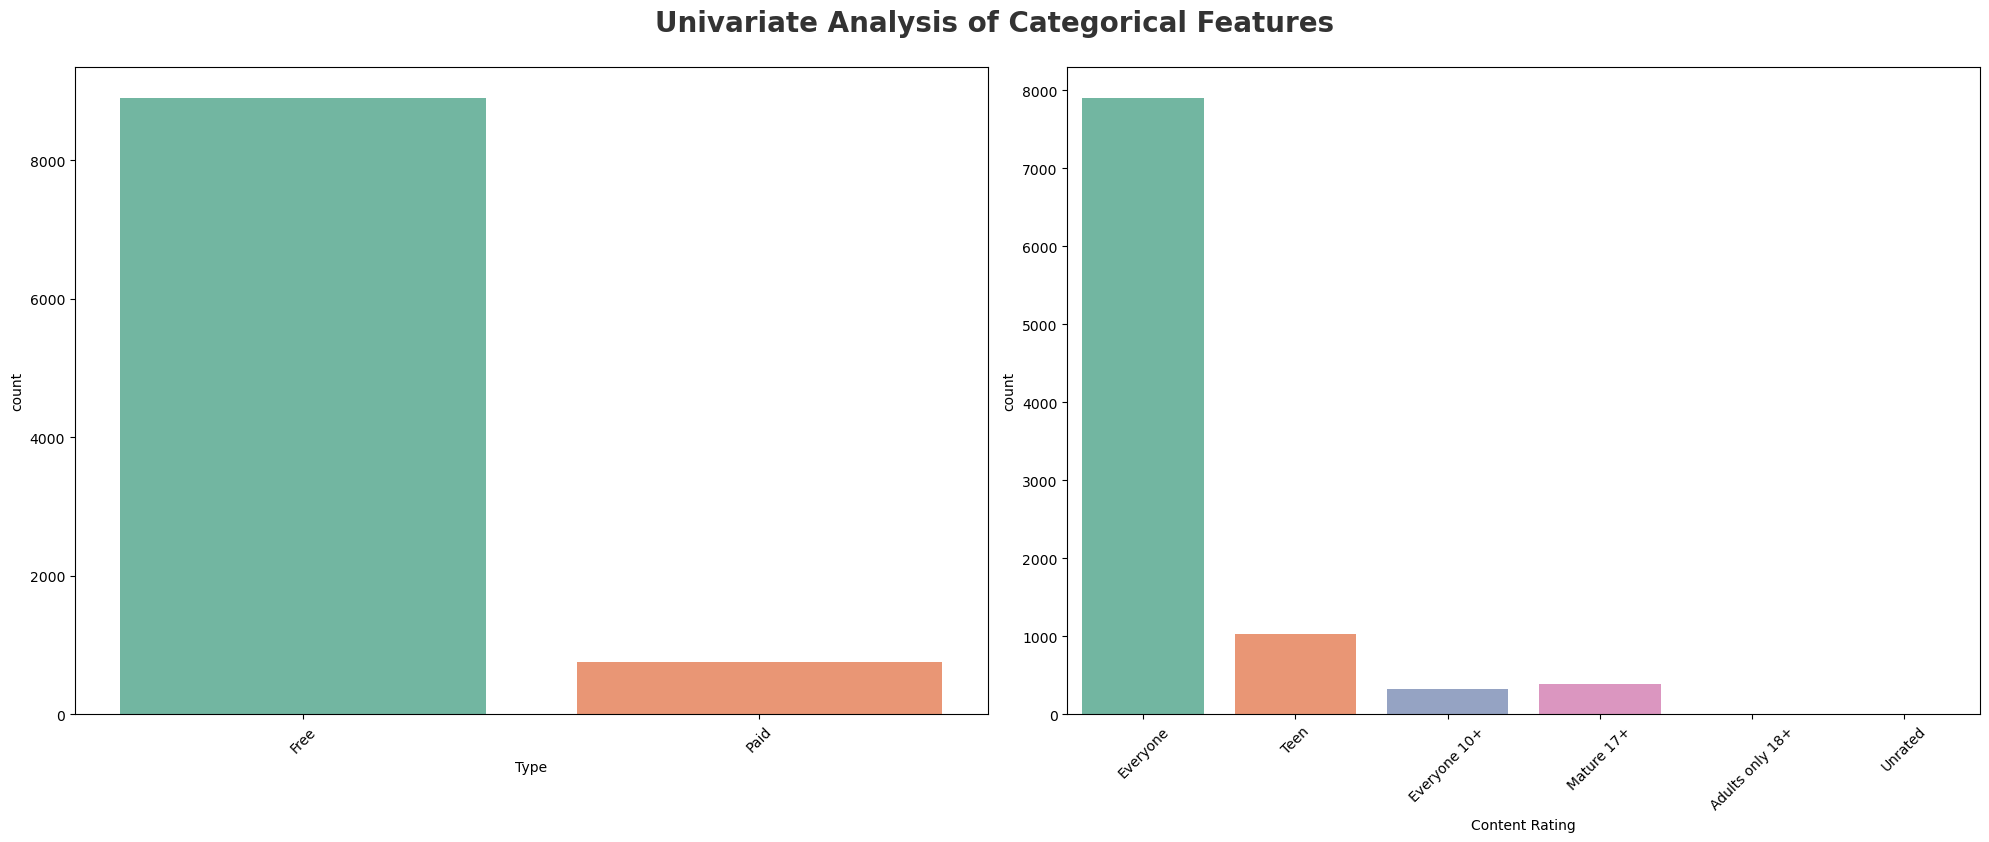

In [17]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',
alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<AxesSubplot: xlabel='Price', ylabel='Density'>

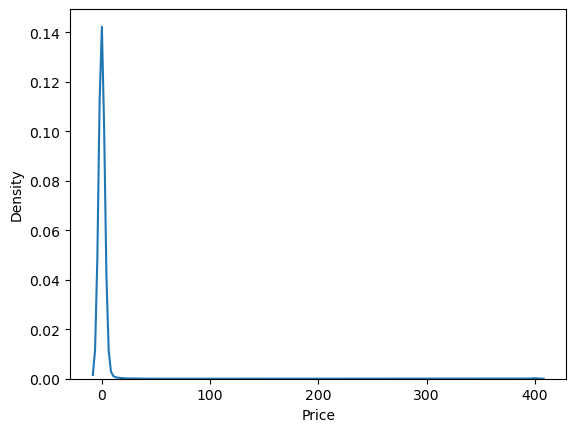

In [18]:
sns.kdeplot(data['Price'])

<AxesSubplot: xlabel='Rating', ylabel='Density'>

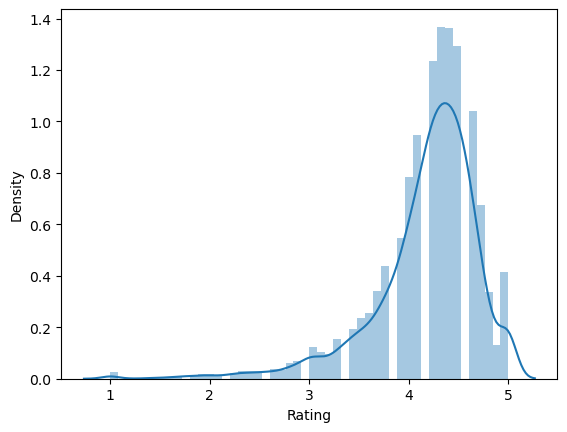

In [19]:
sns.distplot(data['Rating'])

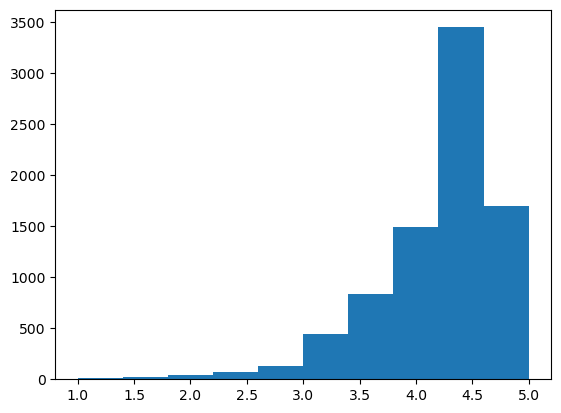

In [20]:
plt.hist(data['Rating'])
plt.show()

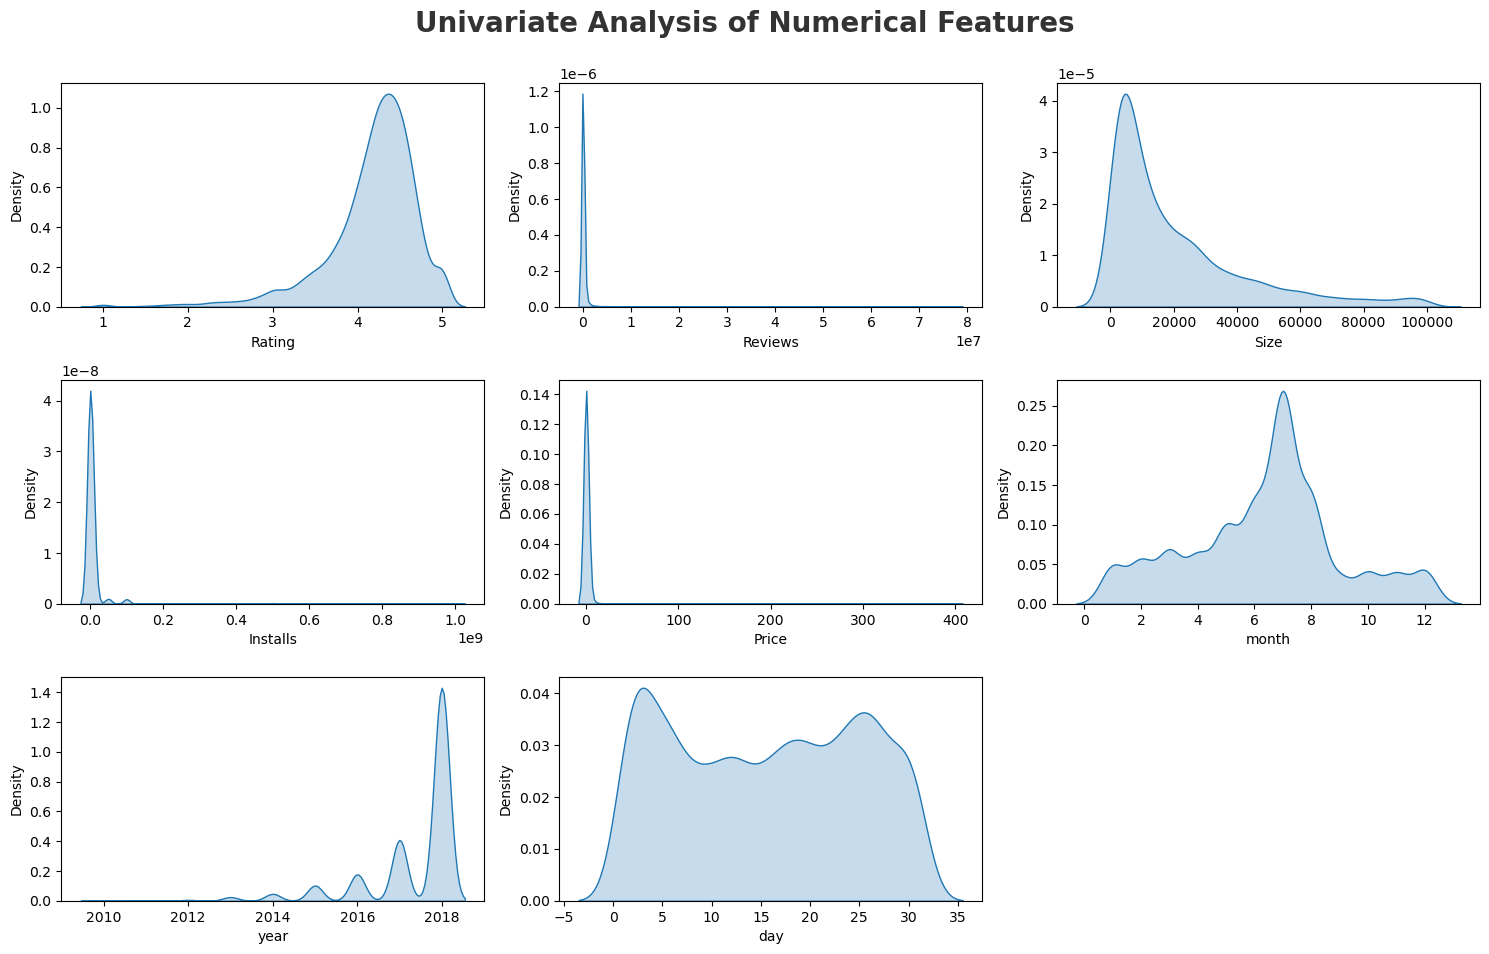

In [21]:
# categorical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',
alpha=0.8, y=1.)
#category = [ 'Type', 'Content Rating']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True,palette='r')
    plt.xlabel(numeric_features[i])
    #plt.xticks(rotation=45)
    plt.tight_layout()

In [22]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,1,2018,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,1,2018,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,8,2018,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,6,2018,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,6,2018,20


In [23]:
df_cat=data['Category'].value_counts()[:10]

In [24]:
df_cat

FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Category, dtype: int64

In [25]:
category=pd.DataFrame(data['Category'].value_counts()[:10])
category.rename(columns={'Category':'Count'})

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


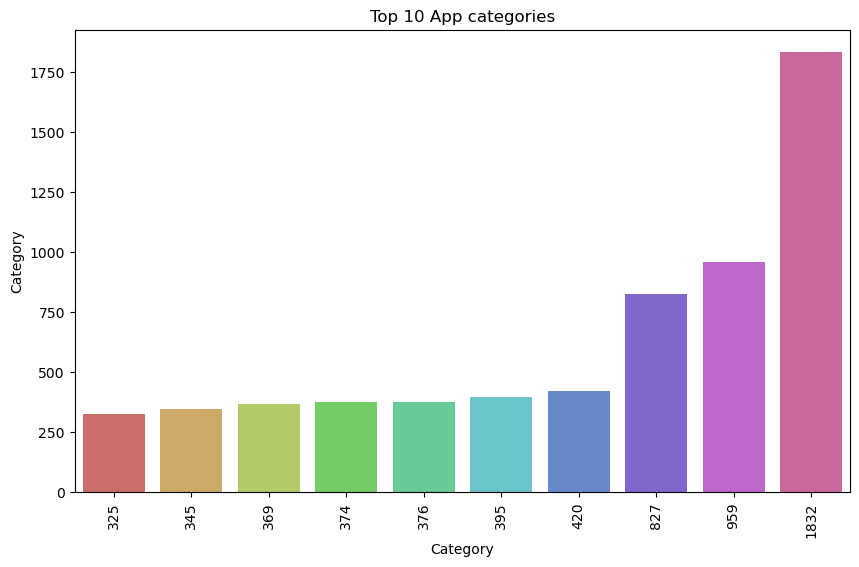

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_cat,y='Category',data=category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#which category having largest number of installs

In [27]:
df_cat_installs=data.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()

In [28]:
df2=df_cat_installs.head(10)

In [29]:
df2

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<AxesSubplot: xlabel='Installs', ylabel='Category'>

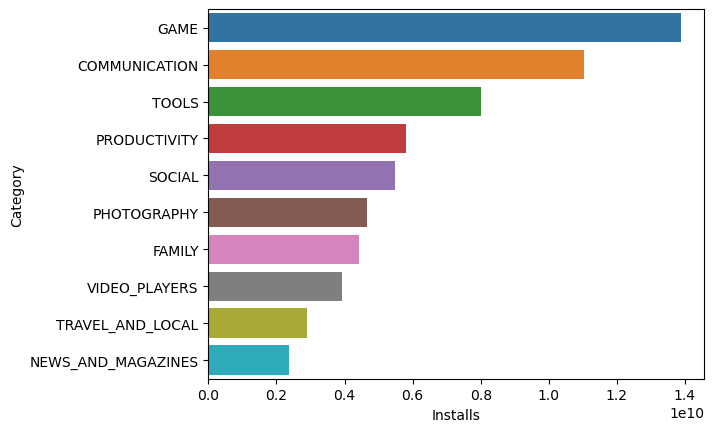

In [30]:
sns.barplot(x="Installs",y="Category",data=df2)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

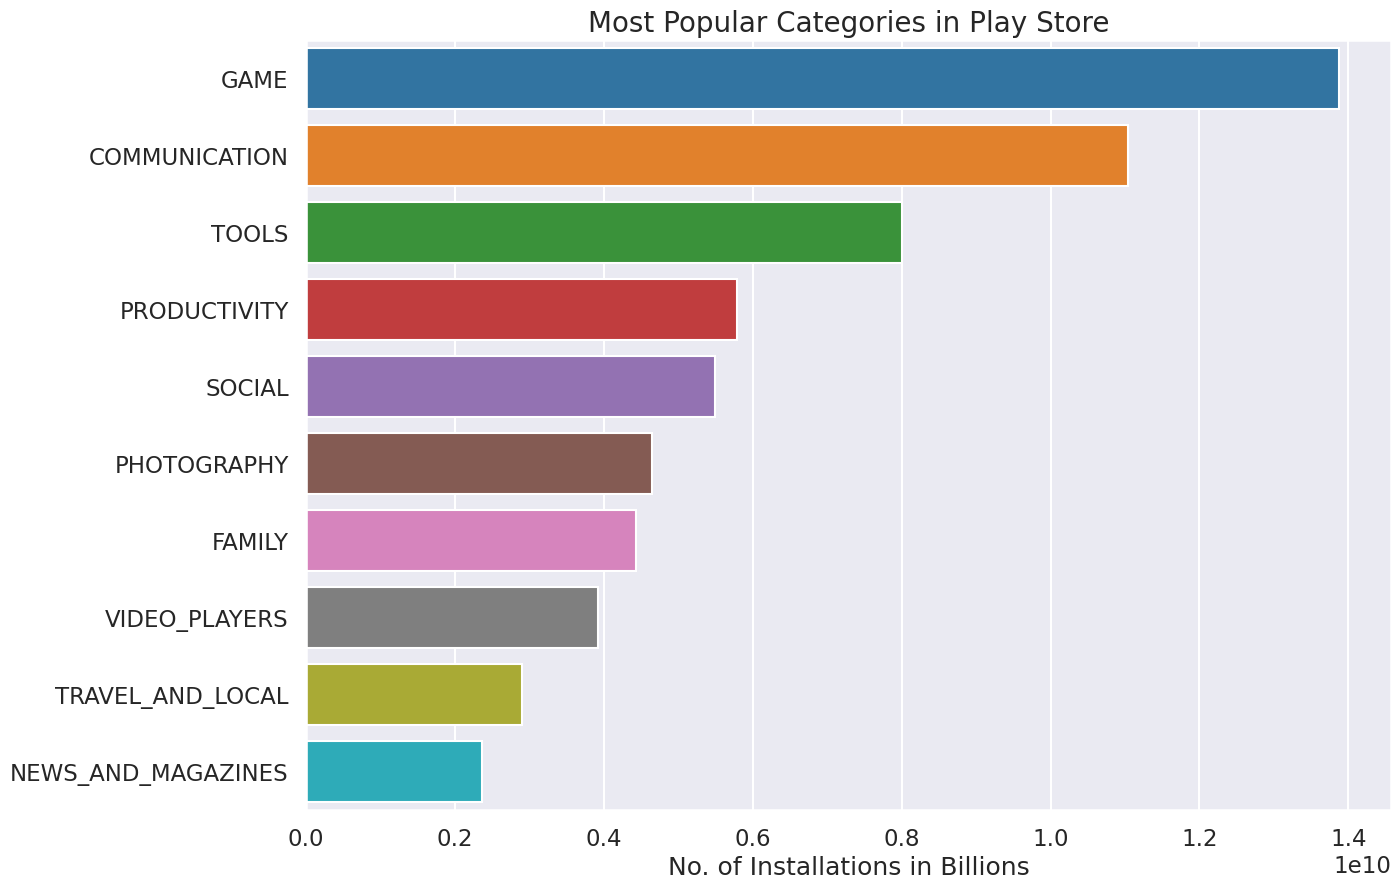

In [31]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)


In [32]:
### What are the Top 5 most installed Apps in Each popular Categories ??
dfa=data.groupby(['Category','App'])['Installs'].sum().reset_index()

In [33]:
dfa

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9654,WEATHER,Yahoo Weather,10000000
9655,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9656,WEATHER,Yandex.Weather,10000000
9657,WEATHER,weather - weather forecast,1000000


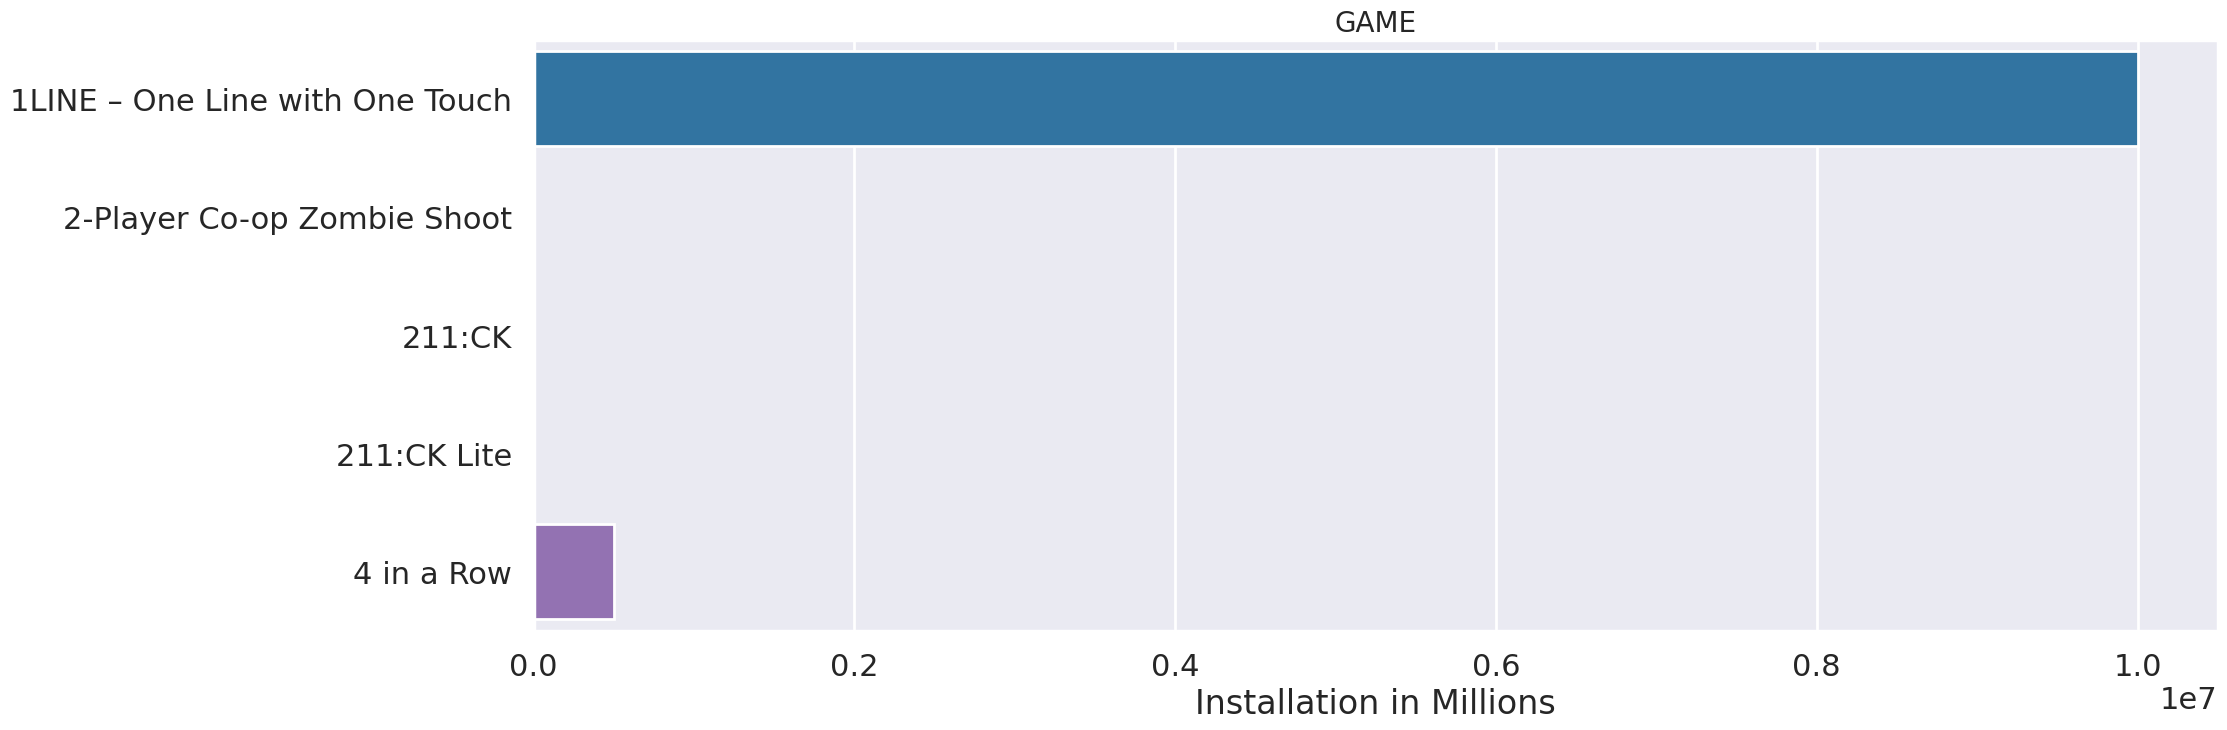

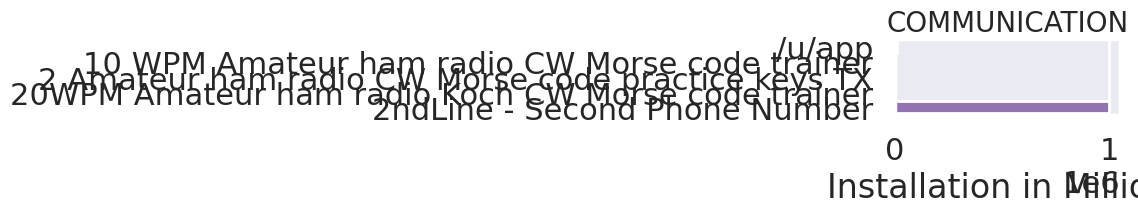

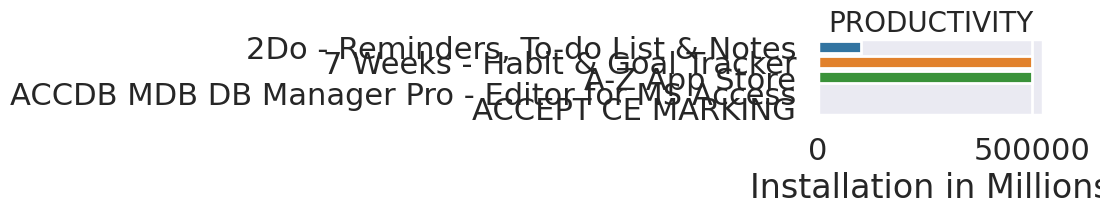

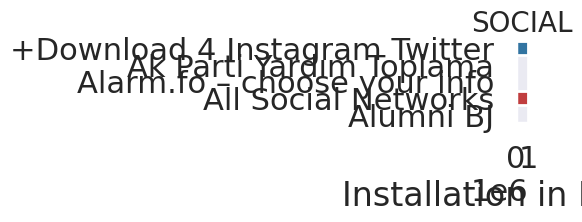

In [34]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))
for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    plt.tight_layout()
    plt.subplots_adjust(hspace= .3)
    plt.show()

In [35]:
rating=data.groupby(["App"])["Rating"].sum().sort_values(ascending=False).reset_index()
rating[rating.Rating==5.0]
rating2 = data.groupby(['Category','Installs',
'App'])['Rating'].sum().sort_values(ascending = False).reset_index()
data.groupby("Category").agg({"Installs":"sum","Reviews":"sum"}).reset_index()
data.groupby(['Category','App'])["Reviews"].sum().reset_index()
data.groupby("Category").agg({"Installs":"sum","Reviews":"sum"}).reset_index()

,Category,Installs,Reviews
0,ART_AND_DESIGN,114338100,1419203
1,AUTO_AND_VEHICLES,53130211,1163666
2,BEAUTY,27197050,396240
3,BOOKS_AND_REFERENCE,1665969576,16721314
4,BUSINESS,697164865,9890245
5,COMICS,44981150,2342071
6,COMMUNICATION,11038276251,285811368
7,DATING,140926107,3623544
8,EDUCATION,352952000,13364148
9,ENTERTAINMENT,2113660000,34762650


<AxesSubplot: title={'center': 'Percentage of Installs Number for Free App and Paid App'}, ylabel='Installs'>

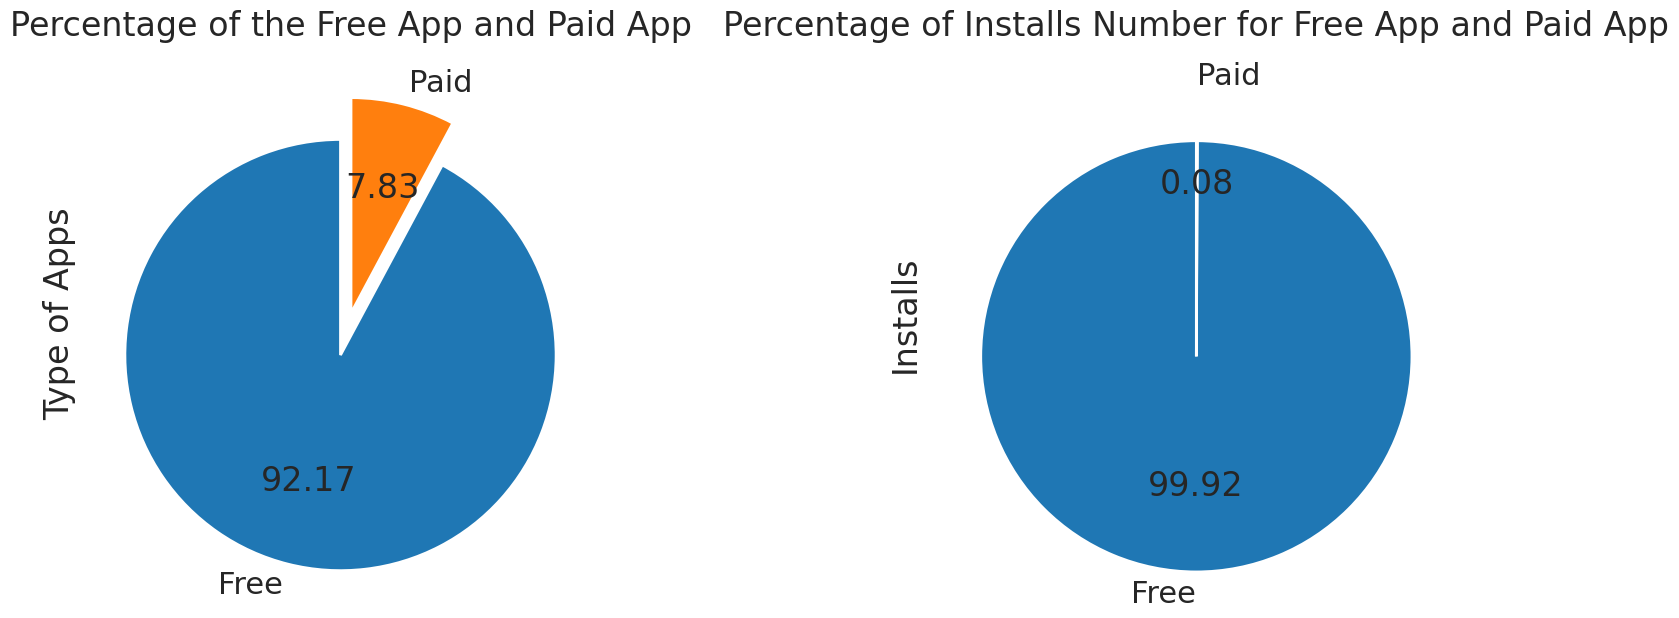

In [44]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
data.value_counts('Type').plot.pie(y='Type',startangle=90, explode=(0.2,0),
title='Percentage of the Free App and Paid App', legend=False, autopct='%.2f',
ax=ax[0])
ax[0].set(ylabel='Type of Apps')
data.groupby('Type').agg({'Installs':sum}).plot.pie(y='Installs', startangle=90,
explode=(0.2,0), title='Percentage of Installs Number for Free App and Paid App',
legend=False, autopct='%.2f', ax=ax[1])